In [57]:
import math
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

def dist(a, b):
    return math.hypot(a[0] - b[0], a[1] - b[1])

class Segment:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
    def get_list(self):
        return [self.p1, self.p2]

class Triangle:
    def __init__(self, a, b, c):
        self.vertices  = [a, b, c]
    def get_segments(self):
        a = self.vertices[0]
        b = self.vertices[1]
        c = self.vertices[2]
        return Segment(a, b), Segment(b, c), Segment(c, a)

    def get_two_closest(self, point):
        dist_a = dist(point, self.vertices[0])
        dist_b = dist(point, self.vertices[1])
        dist_c = dist(point, self.vertices[2])
        if dist_a < dist_b and dist_a < dist_c:
            return self.vertices[1], self.vertices[2]
        if dist_b < dist_c and dist_b < dist_a:
            return self.vertices[2], self.vertices[0]
        if dist_c < dist_b and dist_c < dist_a:
            return self.vertices[0], self.vertices[1]
    def __str__(self):
        return str(self.vertices)


def show_triangles(triangles):
    printed_lines = []
    for t in triangles:
        seg1, seg2, seg3 = t.get_segments()
        printed_lines += [seg1.get_list(), seg2.get_list(), seg3.get_list()]
    lc = mc.LineCollection(printed_lines, linewidths=2)
    fig, ax = pl.subplots(clear=True)
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    pl.show()
    fig.clear()

# def point_in_circumscribed(triangle, point):
#     x_0 = point[0]
#     y_0 = point[1]
#     x_1 = triangle.vertices[0][0]
#     y_1 = triangle.vertices[0][1]
#     x_2 = triangle.vertices[1][0]
#     y_2 = triangle.vertices[1][1]
#     x_3 = triangle.vertices[2][0]
#     y_3 = triangle.vertices[2][1]
#
#     check_res = ((x_0-x_1)*(y_0 - y_3)-(x_0 - x_3)*(y_0 - y_1)) * ((x_2 - x_3)*(x_2 - x_1) + (y_2 - y_3)*(y_2 - y_1))\
#                 + ((x_0 - x_1)*(x_0 - x_3) + (y_0 - y_1) * (y_0 - y_3)) * ((x_2 - x_3)*(y_2 - y_1) - (x_2 - x_1)*(y_2 - y_3))
#
#     return check_res < 0

def l2(p1, p2):
    return np.sqrt(sum((a-b)^2 for a, b in zip(p1, p2)))


def cercle_circonscrit(T):
    (x1, y1), (x2, y2), (x3, y3) = T
    A = np.array([[x3 - x1, y3 - y1], [x3 - x2, y3 - y2]])
    Y = np.array([(x3**2 + y3**2 - x1**2 - y1**2),
                  (x3**2 + y3**2 - x2**2 - y2**2)])
    if np.linalg.det(A) == 0:
        return False
    Ainv = np.linalg.inv(A)
    X = 0.5 * np.dot(Ainv, Y)
    x, y = X[0], X[1]
    r = math.sqrt((x - x1)**2 + (y - y1)**2)
    return (x, y), r


def check_circle_inner(cx, cy, r, px, py):
    return l2([cx, cy], [px, py]) <= r

def point_in_circumscribed(triangle, point):
    c, r = cercle_circonscrit(triangle.vertices)
    return dist(c, point) < r

In [61]:
import random

def generate_points(n):
    points = []
    for i in range(0, n):
        points.append((random.randint(0, 10), random.randint(0, 10)))
    return points

def get_rectangle_points(points):
    x_points = []
    y_points = []
    for point in points:
        x_points.append(point.x)
        y_points.append(point.y)
    min_x = min(x_points)
    min_y = min(y_points)
    max_x = max(x_points)
    max_y = max(y_points)
    # [(min_x, max_y), (max_x, max_y)]
    # [(min_x, min_y), (max_x, min_y)]
    return (min_x, max_y), (max_x, max_y), (max_x, min_y), (min_x, min_y)

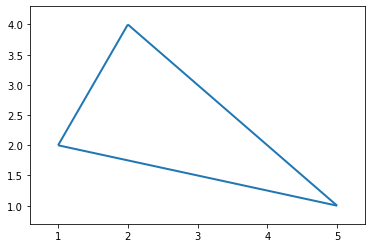

In [65]:
pointss = generate_points(3)
test_tr = Triangle((1, 2), (2, 4), (5, 1))
point_in_circumscribed(test_tr, (3, 2))
show_triangles([test_tr])

sss
[(2, 4), (3, 2), (1, 2)]
[(2, 4), (3, 2), (5, 1)]
[(1, 2), (3, 2), (5, 1)]


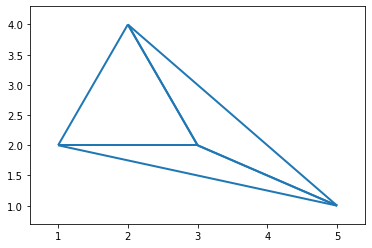

In [59]:
def delete_and_build(triangles, point):
    deleted_tr = []
    deleted_points = set()
    for i in range(len(triangles)):
        if point_in_circumscribed(triangles[i], point):
            deleted_tr.append(triangles[i])
    for triangle in deleted_tr:
        triangles.remove(triangle)
        deleted_points.add(triangle.vertices[0])
        deleted_points.add(triangle.vertices[1])
        deleted_points.add(triangle.vertices[2])
    deleted_points = list(deleted_points)
    while len(deleted_points) > 1:
        contour_p = deleted_points[0]
        second_p = max(deleted_points[1:], key=lambda x: dist(x, contour_p))
        deleted_points.remove(second_p)
        if len(deleted_points) > 1:
            third_p = max(deleted_points[1:], key=lambda x: dist(x, contour_p))
            triangles.append(Triangle(contour_p, point, third_p))
        deleted_points.append(second_p)
        deleted_points.remove(contour_p)
        triangles.append(Triangle(contour_p, point, second_p))
    return triangles

test_triangles = [test_tr]
test_triangles = delete_and_build(test_triangles, (3, 2))
print("sss")
for t in test_triangles:
    print(t)
show_triangles(test_triangles)


[(2, 4), (3, 2), (5, 1)]
[(1, 2), (3, 2), (5, 1)]
[(2, 4), (2, 3), (3, 2)]
[(2, 4), (2, 3), (1, 2)]
[(3, 2), (2, 3), (1, 2)]


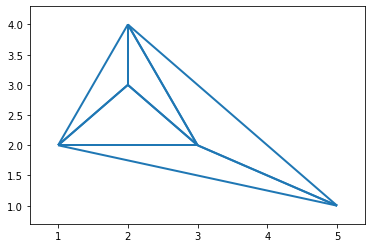

In [64]:

test_triangles = [test_tr]
test_triangles = delete_and_build(test_triangles, (3, 2))
test_triangles = delete_and_build(test_triangles, (2, 3))
for t in test_triangles:
    print(t)
show_triangles(test_triangles)